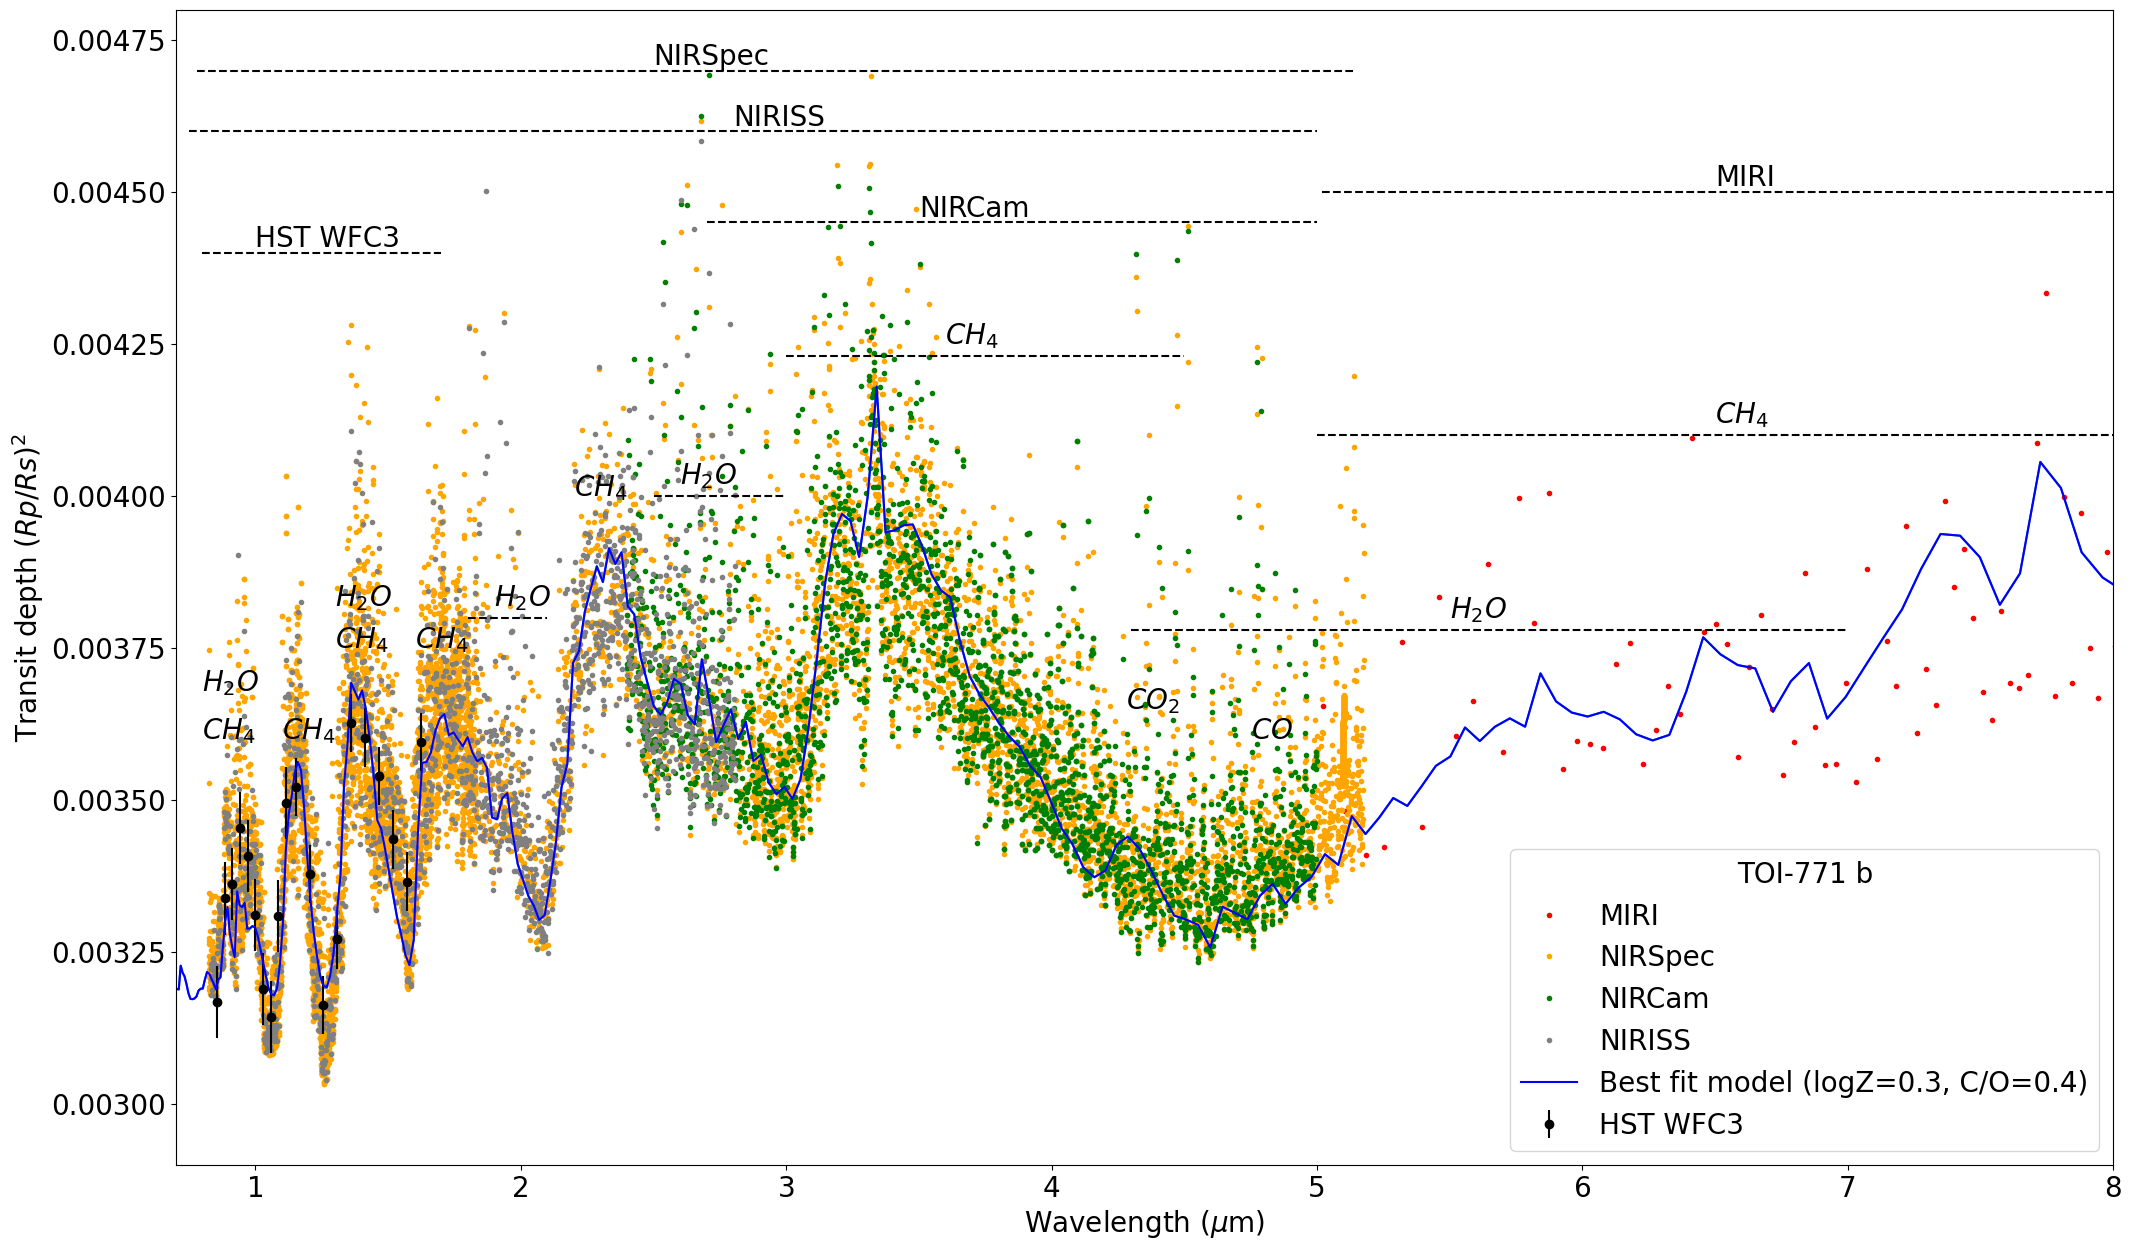

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_sun, R_jup
from platon.abundance_getter import AbundanceGetter
getter = AbundanceGetter()
# Solar logZ and C/O ratio. Modify as required.
abundances = getter.get(0.3, 0.4)

# Zero out CO.  (Note that if CO is a major component, you should probably
# renormalize the abundances of other species so that they add up to 1.)
plt.figure(figsize=(25,15))

#plt.axhspan(i, i+.2, facecolor='0.2', alpha=0.5)
#plt.axvspan(0.5, 5.0, facecolor='yellow', alpha=0.2,label="NIRISS $0.5-5.0 \u03BC$ m")
#plt.axvspan(0.7, 5.14, facecolor='yellow', alpha=0.2,label="NIRSpec $0.7-5.14 \u03BC$ m")
#plt.axvspan(2.7, 5.0, facecolor='yellow', alpha=0.2,label="NIRCam $2.7-5.0 \u03BC$ m")
#plt.axvspan(5.02, 10, facecolor='pink', alpha=0.2,label="MIRI $5.02-25.5 \u03BC$ m")



# All quantities in SI
Rs = 0.241857 * R_sun     #Radius of star
Mp = 0.00877061569608382496 * M_jup     #Mass of planet
Rp = 0.1268204952609958969 * R_jup      #Radius of planet
T = 590.101494500507             #Temperature of isothermal part of the atmosphere
#plt.figure(figsize=(15,9))
for i in range(0,2):
    if i==0:
        #create a TransitDepthCalculator object and compute wavelength dependent transit depths
        depth_calculator = TransitDepthCalculator(method="ktables") #put "xsec" for opacity sampling
        wavelengths, transit_depths = depth_calculator.compute_depths(
            Rs, Mp, Rp, T, logZ=None, CO_ratio=None, add_collisional_absorption=True, cloudtop_pressure=1e4, 
            custom_abundances=abundances )
        
        # Uncomment the code below to print
        
        #print("#Wavelength(m)       Depth")
        #for i in range(len(wavelengths)):
        #    print(wavelengths[i], transit_depths[i])
        
        # Uncomment the code below to plot
        plt.plot(1e6*wavelengths, transit_depths)#, label="logZ=1.5")
    else:
        # influence
        #abundances["Na"] *= 0
        #abundances["K"] *= 0    
       
        #abundances["CO"] *= 0
        #abundances["CO2"] *= 0.05
        
        #abundances["H2O"] *= 0.6
        #abundances["H2S"] *= 0
        
        #abundances["MgH"] *= 0
        #abundances["TiO"] *= 0
        #abundances["VO"] *= 0
       
        #abundances["CH4"] *= 0.2
        
        #abundances["HCl"] *= 0
        #abundances["HCN"] *= 0
        #abundances["HF"] *= 0
    
        #abundances["NH3"] *= 0.15
        #abundances["OCS"] *= 0
        #abundances["OH"] *= 0
        
        #abundances["PH3"] *= 0
        
        #abundances["SiO"] *= 0
        
        #abundances["C2H2"] *= 0
        #abundances["C2H4"] *= 0
        #abundances["C2H6"] *= 0
        
        #abundances["H2CO"] *= 0
        
        #abundances["N2"] *= 0
        #abundances["NO"] *= 0
        #abundances["NO2"] *= 0
        
        #abundances["O2"] *= 0
        #abundances["O3"] *= 0
        
        #abundances["SH"] *= 0
        #abundances["SO2"] *= 0
    
        #abundances["SiH"] *= 0
        
        #create a TransitDepthCalculator object and compute wavelength dependent transit depths
        depth_calculator = TransitDepthCalculator(method="ktables") #put "xsec" for opacity sampling
        wavelengths, transit_depths = depth_calculator.compute_depths(
            Rs, Mp, Rp, T, T_star=3306.0, logZ=None, CO_ratio=None, 
            add_gas_absorption=True, add_scattering=True, 
            scattering_factor=1, scattering_slope=4, 
            scattering_ref_wavelength=1e-06, add_collisional_absorption=True, 
            cloudtop_pressure=1e4, 
                custom_abundances=abundances )
        
        # Uncomment the code below to print
        
        #print("#Wavelength(m)       Depth")
        #for i in range(len(wavelengths)):
        #    print(wavelengths[i], transit_depths[i])
        
        # Uncomment the code below to plot
        #plt.plot(1e6*wavelengths, transit_depths, color="red",label="no $CH_4; H_2O$")
#plt.xlim(0,1) 
#plt.title("Transmission Spectrum for TOI-771 b", size=20)       
plt.xlabel("Wavelength ($\u03BC$m)", size=20)
plt.ylabel("Transit depth $(Rp/Rs)^2$", size=20)

#plt.grid()






#JWST


# 1 pixel JWST MIRI Slitless
pickleFile = open("ETC-calculation-TOI771b-JWST-Slitless-MIRI-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']

#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=50
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')
#plt.xlim(0.8,1.5)
plt.plot(wave,spectrum,'.', color='red',label="MIRI")
#plt.plot(w,s,'.')



#JWST NIRSpec G140H f070lp SUB 2048 TOI-771b 1 pixel
pickleFile = open("ETC-calculation-TOI771b-JWST-G140H-f070lp-NIRSpec-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']

#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=50
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')
#plt.xlim(0.8,1.5)
plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')




#JWST NIRSpec G140H f100lp SUB 2048 TOI-771b 1 pixel
pickleFile = open("ETC-calculation-TOI771b-JWST-G140H-f100lp-NIRSpec-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')




#JWST NIRSpec G235M f170lp SUB 2048 TOI-771b 1 pixel
pickleFile1 = open("ETC-calculation-TOI771b-JWST-G235M-f170lp-NIRSpec-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')






#JWST NIRSpec G395H f290lp SUB 2048 TOI-771b 1 pixel
pickleFile1 = open("ETC-calculation-TOI771b-JWST-G395H-f290lp-NIRSpec-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange',label="NIRSpec")
#plt.scatter(w,s,color='red')




#JWST NIRCam F322W2 TOI-771b 1 pixel
pickleFile1 = open("ETC-calculation-TOI771b-JWST-F322W2-NIRCam-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='green')
#plt.plot(w,s,'.')



#JWST NIRCam F444W TOI-771b 1 pixel
pickleFile1 = open("ETC-calculation-TOI771b-JWST-F444W-NIRCam-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='green',label="NIRCam")
#plt.plot(w,s,'.')
#plt.xlim(0.8,8)





#JWST NIRISS Sub256 TOI-771b 1 pixel
pickleFile1 = open("ETC-calculation-TOI771b-JWST-Sub256-NIRISS-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='gray',label="NIRISS")
#plt.plot(w,s,'.')




#HST

#10 channels HST G141
binwave=np.array([1.1515, 1.204 , 1.256 , 1.3085, 1.3615, 1.414 , 1.466 , 1.5185,
       1.5715, 1.624 ])
binspec=np.array([0.00352147, 0.00337846, 0.00316254, 0.00327065, 0.00362606,
       0.00360261, 0.00353897, 0.00343501, 0.00336583, 0.00359523])
error=4.790290652857819e-05
plt.errorbar(binwave,binspec,yerr=error,fmt='o', color='black')
#plt.xlim(1,2)
#plt.ylim(0.0025,0.0045)



'''
#25 channels HST G141
binwave=np.array([1.1355, 1.1565, 1.1775, 1.1985, 1.2195, 1.2405, 1.2615, 1.2825,
       1.3035, 1.3245, 1.3455, 1.3665, 1.3875, 1.4085, 1.4295, 1.4505,
       1.4715, 1.4925, 1.5135, 1.5345, 1.5555, 1.5765, 1.5975, 1.6185,
       1.6395])
binspec=np.array([0.00351343, 0.00370237, 0.00366736, 0.00338534, 0.00323044,
       0.00318458, 0.0031449 , 0.00331699, 0.00330206, 0.00340127,
       0.00358464, 0.00362876, 0.00361398, 0.00368868, 0.00363366,
       0.0036383 , 0.00357144, 0.00361058, 0.00349541, 0.00340721,
       0.00344001, 0.00329082, 0.00338286, 0.00365405, 0.00362336])
error=7.57411455862284e-05
plt.errorbar(binwave,binspec,yerr=error,fmt='o')
plt.xlim(1,2)
plt.ylim(0.0025,0.0045)
'''



#10 channels HST G102
binwave=np.array([0.8545, 0.8835, 0.9125, 0.9415, 0.9705, 0.9995, 1.0285, 1.0575,
       1.0865, 1.1155])
binspec=np.array([0.00316723, 0.00333802, 0.00336153, 0.00345434, 0.00340762,
       0.00331074, 0.00318959, 0.00314283, 0.00330923, 0.00349471])
error=5.936252619834117e-05
plt.errorbar(binwave,binspec,yerr=error,fmt='o', color='black',label="HST WFC3")
#plt.xlim(0.8,10)
#plt.ylim(0.0025,0.0045)



'''
#25 channels HST G102
binwave=np.array([0.846 , 0.8575, 0.869 , 0.8805, 0.892 , 0.904 , 0.9155, 0.927 ,
       0.9385, 0.95  , 0.962 , 0.9735, 0.985 , 0.9965, 1.008 , 1.02  ,
       1.0315, 1.043 , 1.0545, 1.066 , 1.078 , 1.0895, 1.101 , 1.1125,
       1.124 ])
binspec=np.array([0.0031949 , 0.00327194, 0.0031596 , 0.00339468, 0.0033641 ,
       0.0035085 , 0.00331102, 0.00348075, 0.00346839, 0.00351126,
       0.0032893 , 0.00344381, 0.00333156, 0.00339627, 0.00312885,
       0.00324205, 0.00318596, 0.00298587, 0.00322273, 0.00326225,
       0.00315077, 0.00329309, 0.0034077 , 0.00326318, 0.00351135])
error=9.38603952240872e-05
plt.errorbar(binwave,binspec,yerr=error,fmt='o')
plt.xlim(0.8,2)
plt.ylim(0.0025,0.0045)
'''


plt.annotate("HST WFC3", (1.0,0.00441), size=20)
x1=[0.8,1.7]
y1=[0.00440,0.00440]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRSpec", (2.5, 0.00471), size=20)
x1=[0.78,5.14]
y1=[0.00470,0.00470]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRCam", (3.5,0.00446), size=20)
x1=[2.7,5.0]
y1=[0.00445,0.00445]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRISS", (2.8,0.00461), size=20)
x1=[0.75,5.0]
y1=[0.00460,0.00460]
plt.plot(x1,y1, '--', color='black')


plt.annotate("MIRI", (6.5,0.00451), size=20)
x1=[5.02,25.5]
y1=[0.00450,0.00450]
plt.plot(x1,y1, '--', color='black')


#Molecules
plt.annotate("$CO$", (4.75,0.00360), size=20)

plt.annotate("$CO_2$", (4.28,0.00365), size=20)

plt.annotate("$H_2O$", (5.5,0.00380), size=20)
x1=[4.3,7.0]
y1=[0.00378,0.00378]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$H_2O$", (2.6,0.00402), size=20)
x1=[2.5,3.0]
y1=[0.00400,0.00400]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$H_2O$", (1.9,0.00382), size=20)
x1=[1.8,2.1]
y1=[0.00380,0.00380]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$H_2O$", (1.3,0.00382), size=20)
plt.annotate("$H_2O$", (0.8,0.00368), size=20)


plt.annotate("$CH_4$", (3.6,0.00425), size=20)
x1=[3.0,4.5]
y1=[0.00423,0.00423]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$CH_4$", (6.5,0.00412), size=20)
x1=[5.0,10]
y1=[0.00410,0.00410]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$CH_4$", (2.2,0.00400), size=20)
plt.annotate("$CH_4$", (1.6,0.00375), size=20)
plt.annotate("$CH_4$", (1.3,0.00375), size=20)
plt.annotate("$CH_4$", (1.1,0.00360), size=20)
plt.annotate("$CH_4$", (0.8,0.00360), size=20)


plt.xlim(0.7,8.0)
plt.ylim(0.0029,0.00480)
plt.plot(1e6*wavelengths, transit_depths, color="blue", label="Best fit model (logZ=0.3, C/O=0.4)")


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.legend(fontsize=20, title="TOI-771 b", title_fontsize=20)

plt.savefig(os.path.join('','TOI-771b.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')